In [ ]:
# import necessary modules for image download and preprocessing
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url

In [ ]:
# function to search image online
def search_images(term, max_images=200):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
searches = 'cat','dog'
path = Path('copy the project folder path in the drive') # for example '/content/drive/MyDrive/project'
from time import sleep

for o in searches:
    dest = (path/'cat_or_dog'/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/'cat_or_dog'/o, max_size=400, dest=path/'cat_or_dog'/o)

Searching for 'cat photo'
Searching for 'dog photo'


In [ ]:
# Some photos might not download correctly which could cause our model training to fail, so we'll remove them:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

16

In [ ]:
# import necessary modules for model building and classification
import numpy as np
import os
from PIL import Image
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [ ]:
# Step 1: Data Preprocessing
def preprocess_image(image_path):
    # Load the image using PIL
    image = Image.open(image_path)

    # Resize the image to a consistent size if needed
    target_size = (32, 32)
    if image.size != target_size:
        image = image.resize(target_size)

    # Convert the image to grayscale and flatten it into a 1D array
    image = image.convert('L')
    image_array = np.array(image).flatten()

    # Normalize pixel values to the range [0, 1]
    image_array = image_array / 255.0

    return image_array



# Step 2: Quantum Feature Extraction
def quantum_feature_extraction(image):
    # Create a quantum circuit with the number of qubits based on the image size
    num_qubits = int(np.log10(image.size))
    qc = QuantumCircuit(num_qubits)

    # Apply random quantum gates to encode the image
    for i in range(num_qubits):
        qc.h(i)
        qc.rx(np.random.uniform(0, 2 * np.pi), i)

    # Measure the quantum states
    qc.measure_all()

    # Simulate the quantum circuit
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1)
    result = job.result().get_counts()

    # Convert measurement results to a feature vector
    feature_vector = np.zeros(2 ** num_qubits)
    for key, value in result.items():
        index = int(key[::-1], 2)
        feature_vector[index] = value

    return feature_vector

In [ ]:
# Step 3: Load and preprocess the images
cat_folder = path + '/cat_or_dog/cat'
dog_folder = path + '/cat_or_dog/dog'

# Process cat images
cat_images = []
cat_labels = []
for filename in os.listdir(cat_folder):
    image_path = os.path.join(cat_folder, filename)
    image_array = preprocess_image(image_path)
    cat_images.append(image_array)
    cat_labels.append('Cat')

# Process dog images
dog_images = []
dog_labels = []
for filename in os.listdir(dog_folder):
    image_path = os.path.join(dog_folder, filename)
    image_array = preprocess_image(image_path)
    dog_images.append(image_array)
    dog_labels.append('Dog')

# Combine the cat and dog images and labels
images = np.array(cat_images + dog_images)
labels = np.array(cat_labels + dog_labels)

In [ ]:
images.shape, labels.shape

((248, 1024), (248,))

In [ ]:
# Apply quantum feature extraction to all images
quantum_features = []
for image in images:
    feature_vector = quantum_feature_extraction(image)
    quantum_features.append(feature_vector)

In [ ]:
# Step 4: Train the model
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(quantum_features, labels, test_size=0.3, random_state=42)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train a classical machine learning model (Support Vector Machine - SVM)
svm = SVC()
svm.fit(X_train, y_train_encoded)

SVC()

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Create individual classifiers
classifier1 = RandomForestClassifier()
classifier2 = GradientBoostingClassifier()
classifier3 = SVC()

# Create the voting classifier
voting_classifier = VotingClassifier(estimators=[('rf', classifier1), ('gb', classifier2), ('svm', classifier3)], voting='hard')

# Train the voting classifier
X_train, X_test, y_train, y_test = train_test_split(quantum_features, labels, test_size=0.3, random_state=25)
voting_classifier.fit(X_train, y_train)

# Evaluate the voting classifier
accuracy = voting_classifier.score(X_test, y_test)
accuracy

0.5466666666666666

Searching for 'cat photo'


c:\Program Files\Python311\Lib\site-packages\duckduckgo_search\compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
c:\Program Files\Python311\Lib\site-packages\duckduckgo_search\compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
c:\Program Files\Python311\Lib\site-packages\duckduckgo_search\compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


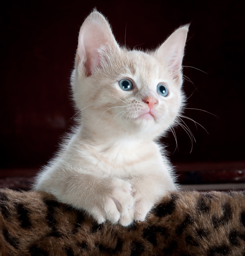

In [ ]:
# 1. new cat photo
download_url(search_images('cat photo')[0], path + '/cat.jpg', show_progress=False)
Image.open(path + '/cat.jpg').to_thumb(256,256)

Searching for 'dog photo'


c:\Program Files\Python311\Lib\site-packages\duckduckgo_search\compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
c:\Program Files\Python311\Lib\site-packages\duckduckgo_search\compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
c:\Program Files\Python311\Lib\site-packages\duckduckgo_search\compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


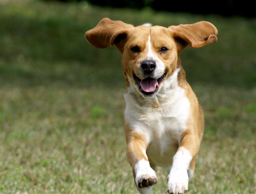

In [ ]:
# 2. new dog photo
download_url(search_images('dog photo')[0], path + '/dog.jpg', show_progress=False)
Image.open(path +'/dog.jpg').to_thumb(256,256)

In [ ]:
# Step 5: Test with a new image
# Preprocess the new image
new_image_path = path + '/dog.jpg'  # Replace with the path to your new image
new_image = preprocess_image(new_image_path)

# Apply quantum feature extraction to the new image
new_feature_vector = quantum_feature_extraction(new_image)

# Make predictions on the new image
predicted_label_encoded = svm.predict([new_feature_vector])
predicted_label = label_encoder.inverse_transform(predicted_label_encoded)

print("Predicted Label:", predicted_label)

Predicted Label: ['Dog']
